In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import json
import baseline
from baseline import *
from decoder import *
from alphabet import *
from train import *
import torch
from matplotlib import pyplot as plt

torch.__version__

'1.4.0'

In [2]:
LANGUAGE = 'Python'

def filter_ascii(strings):
    'Returns only the strings that can be encoded in ASCII.'
    l = []
    for s in strings:
        try:
            s.encode('ascii')
            if len(s) <= 80:
                l.append(s)
        except UnicodeEncodeError:
            pass
        
    return l

with open('dataset/medium.json') as f:
    multilang_dataset = json.load(f)
    dataset = multilang_dataset[LANGUAGE]
    
    dataset['train'] = filter_ascii(dataset['train'])
    dataset['dev'] = filter_ascii(dataset['dev'])
    dataset['test'] = filter_ascii(dataset['test'])
    
    tiny_dataset = {
        'train': dataset['train'][:50],
        'dev': dataset['train'][:50],
        'test': dataset['train'][:50],
    }
    
    print('{} training examples, {} validation examples, {} test exampless'.format(
        len(dataset['train']), 
        len(dataset['dev']),
        len(dataset['test'])))

76738 training examples, 9590 validation examples, 9616 test exampless


In [3]:
def generate_dumb_dataset():
    'Returns a dataset where all examples are the same string, which consists of 10 times the same letter.'

    SIZE = 200
    l = []

    for i in range(SIZE):
        l.append(random.choice('abcdefghijklmnopqrstuvwxyz') * random.choice([5, 10]))
        
    return {'train': l, 'dev': l, 'test': l}

dumb_dataset = generate_dumb_dataset()

In [4]:
device = torch.device(0) if torch.cuda.is_available() else torch.device('cpu')
print(device)

alphabet = AsciiOneHotEncoding(device)
encoder = baseline.UniformEncoder(0.9)
decoder = AutoCompleteDecoderModel(alphabet, hidden_size=64)

cpu


Epoch 0 iteration 0: loss = 4.855, tp = 28.23 lines/s, ETA 00h26m25s
Epoch 14 iteration 2: loss = 3.068, tp = 546.41 lines/s, ETA 00h01m16s
Epoch 28 iteration 4: loss = 2.991, tp = 599.74 lines/s, ETA 00h01m03s
Epoch 42 iteration 6: loss = 2.917, tp = 606.59 lines/s, ETA 00h00m57s
Epoch 57 iteration 1: loss = 2.705, tp = 621.41 lines/s, ETA 00h00m51s
Epoch 71 iteration 3: loss = 2.401, tp = 629.86 lines/s, ETA 00h00m45s
Epoch 85 iteration 5: loss = 2.455, tp = 629.29 lines/s, ETA 00h00m40s
Epoch 100 iteration 0: loss = 1.864, tp = 632.43 lines/s, ETA 00h00m35s
Epoch 114 iteration 2: loss = 2.100, tp = 636.31 lines/s, ETA 00h00m30s
Epoch 128 iteration 4: loss = 1.664, tp = 639.55 lines/s, ETA 00h00m24s
Epoch 142 iteration 6: loss = 1.079, tp = 642.95 lines/s, ETA 00h00m19s
Epoch 157 iteration 1: loss = 1.142, tp = 645.35 lines/s, ETA 00h00m14s
Epoch 171 iteration 3: loss = 0.751, tp = 645.28 lines/s, ETA 00h00m09s
Epoch 185 iteration 5: loss = 0.664, tp = 646.98 lines/s, ETA 00h00m04s


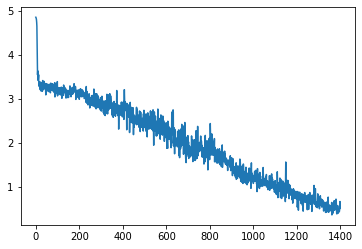

In [5]:
parameters = {
    'learning_rate': 5e-3,
    'verbose': True,
    'batch_size': 32,
    'init_scale': 0.01,
    'epochs': 200,
}

train_loss_history = train(encoder, decoder, dumb_dataset, parameters, device)
plt.plot(train_loss_history)

# End-to-end samples

In [11]:
SPLIT = 'train'

import copy

s = random.choice(dumb_dataset[SPLIT])
compressed = encoder.encode(s)
decompressed = decoder([compressed])

print('String:', repr(s))
print('Encoded:', repr(compressed))
print('Decoded:', repr(decompressed[0]))
print(len(decompressed))

String: 'iiiiiiiiii'
Encoded: 'iiiiiiii'
Decoded: 'innnnnnn'
1


In [9]:
def top1accuracy(dataset):
    return len(list(filter(lambda s: s == decoder([encoder.encode(s)])[0],
                         dataset)))/len(dataset)
print(top1accuracy(dumb_dataset[SPLIT]))

0.25
